In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

classification_df = pd.read_csv("/content/drive/MyDrive/A.I./2408034_Pratik Karki /HealthStatistics.csv")
print(classification_df.head())

     Country  Year         Disease Name Disease Category  Prevalence Rate (%)  \
0      Italy  2013              Malaria      Respiratory                 0.95   
1     France  2002                Ebola        Parasitic                12.46   
2     Turkey  2015             COVID-19          Genetic                 0.91   
3  Indonesia  2011  Parkinson's Disease       Autoimmune                 4.68   
4      Italy  2013         Tuberculosis          Genetic                 0.83   

   Incidence Rate (%)  Mortality Rate (%) Age Group Gender  \
0                1.55                8.42      0-18   Male   
1                8.63                8.75       61+   Male   
2                2.35                6.22     36-60   Male   
3                6.29                3.99      0-18  Other   
4               13.59                7.01       61+   Male   

   Population Affected  ...  Hospital Beds per 1000  Treatment Type  \
0               471007  ...                    7.58      Medication  

In [126]:
print(classification_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Country                             100000 non-null  object 
 1   Year                                100000 non-null  int64  
 2   Disease Name                        100000 non-null  object 
 3   Disease Category                    100000 non-null  object 
 4   Prevalence Rate (%)                 100000 non-null  float64
 5   Incidence Rate (%)                  100000 non-null  float64
 6   Mortality Rate (%)                  100000 non-null  float64
 7   Age Group                           100000 non-null  object 
 8   Gender                              100000 non-null  object 
 9   Population Affected                 100000 non-null  int64  
 10  Healthcare Access (%)               100000 non-null  float64
 11  Doctors per 1000           

In [ ]:
print(classification_df.describe(include="all"))

       Country           Year Disease Name Disease Category  \
count   100000  100000.000000       100000           100000   
unique      20            NaN           20               11   
top     Russia            NaN    Influenza       Autoimmune   
freq      5160            NaN         5142             9170   
mean       NaN    2012.020470          NaN              NaN   
std        NaN       7.203293          NaN              NaN   
min        NaN    2000.000000          NaN              NaN   
25%        NaN    2006.000000          NaN              NaN   
50%        NaN    2012.000000          NaN              NaN   
75%        NaN    2018.000000          NaN              NaN   
max        NaN    2024.000000          NaN              NaN   

        Prevalence Rate (%)  Incidence Rate (%)  Mortality Rate (%) Age Group  \
count         100000.000000       100000.000000       100000.000000    100000   
unique                  NaN                 NaN                 NaN         4   


In [127]:
print("Missing values for null: \n", classification_df.isnull().sum())

Missing values for null: 
 Country                               0
Year                                  0
Disease Name                          0
Disease Category                      0
Prevalence Rate (%)                   0
Incidence Rate (%)                    0
Mortality Rate (%)                    0
Age Group                             0
Gender                                0
Population Affected                   0
Healthcare Access (%)                 0
Doctors per 1000                      0
Hospital Beds per 1000                0
Treatment Type                        0
Average Treatment Cost (USD)          0
Availability of Vaccines/Treatment    0
Recovery Rate (%)                     0
DALYs                                 0
Improvement in 5 Years (%)            0
Per Capita Income (USD)               0
Education Index                       0
Urbanization Rate (%)                 0
dtype: int64


In [128]:
print("checking if there is any duplicate rows in regression data:", classification_df.duplicated().sum())

checking if there is any duplicate rows in regression data: 0


In [129]:
print(classification_df.columns)


Index(['Country', 'Year', 'Disease Name', 'Disease Category',
       'Prevalence Rate (%)', 'Incidence Rate (%)', 'Mortality Rate (%)',
       'Age Group', 'Gender', 'Population Affected', 'Healthcare Access (%)',
       'Doctors per 1000', 'Hospital Beds per 1000', 'Treatment Type',
       'Average Treatment Cost (USD)', 'Availability of Vaccines/Treatment',
       'Recovery Rate (%)', 'DALYs', 'Improvement in 5 Years (%)',
       'Per Capita Income (USD)', 'Education Index', 'Urbanization Rate (%)'],
      dtype='object')


In [130]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Columns to keep
columns_to_keep = [
    "Availability of Vaccines/Treatment",
    "Mortality Rate (%)",
    "Prevalence Rate (%)",
    "Incidence Rate (%)",
    "Healthcare Access (%)",
    "Doctors per 1000",
    "Hospital Beds per 1000",
    "Per Capita Income (USD)",
    "Education Index",
    "Urbanization Rate (%)",
    "Age Group",
    "Gender",
    "Disease Category"
]

# Keep only selected columns
classification_df = classification_df[columns_to_keep]

# Convert "Availability of Vaccines/Treatment" to binary (Yes = 1, No = 0)
classification_df.loc[:, "Availability of Vaccines/Treatment"] = classification_df["Availability of Vaccines/Treatment"].map({"Yes": 1, "No": 0})

# Encode categorical variables
label_encoders = {}  # Store encoders if needed later
for col in ["Age Group", "Gender", "Disease Category"]:
    le = LabelEncoder()
    classification_df.loc[:, col] = le.fit_transform(classification_df[col])
    label_encoders[col] = le  # Store for potential inverse transformation

# Normalize numerical features (optional but recommended for logistic regression)
scaler = StandardScaler()
numerical_cols = [
    "Mortality Rate (%)",
    "Prevalence Rate (%)",
    "Incidence Rate (%)",
    "Healthcare Access (%)",
    "Doctors per 1000",
    "Hospital Beds per 1000",
    "Per Capita Income (USD)",
    "Education Index",
    "Urbanization Rate (%)"
]
classification_df.loc[:, numerical_cols] = scaler.fit_transform(classification_df[numerical_cols])

# Now df is ready for logistic regression
print("Data preprocessing complete! Ready for logistic regression.")


Data preprocessing complete! Ready for logistic regression.


<ipython-input-130-1b3116e56fcb>:47: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.17023953  1.05526417 -1.33224858 ...  0.34435828 -0.90643812
 -0.05132638]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  classification_df.loc[:, numerical_cols] = scaler.fit_transform(classification_df[numerical_cols])


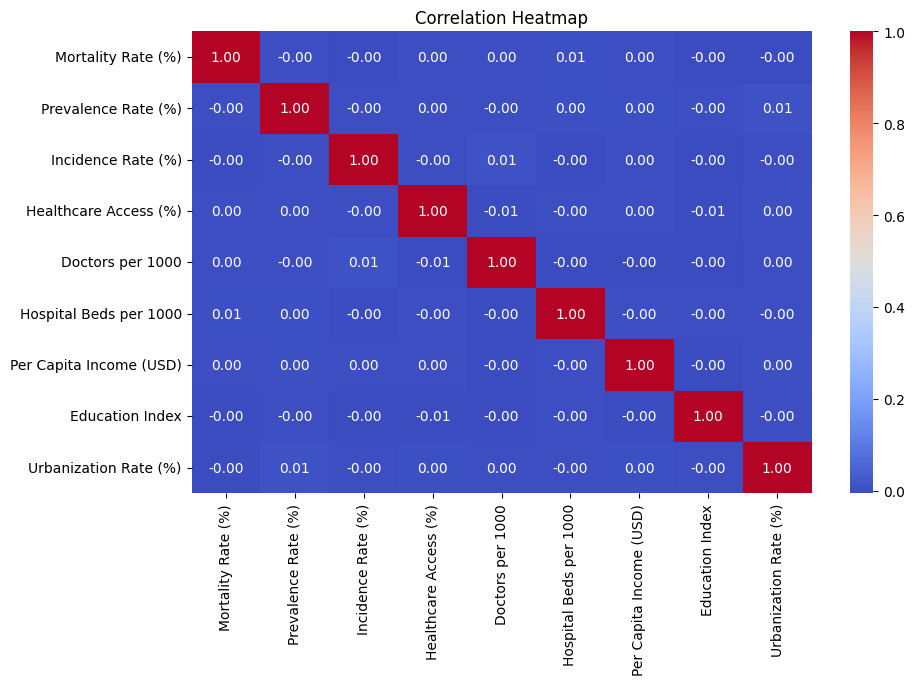

In [131]:
numeric_df = classification_df.select_dtypes(include=["number"])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

<ipython-input-132-be0ceb90b157>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=classification_df["Disease Category"], palette="coolwarm")


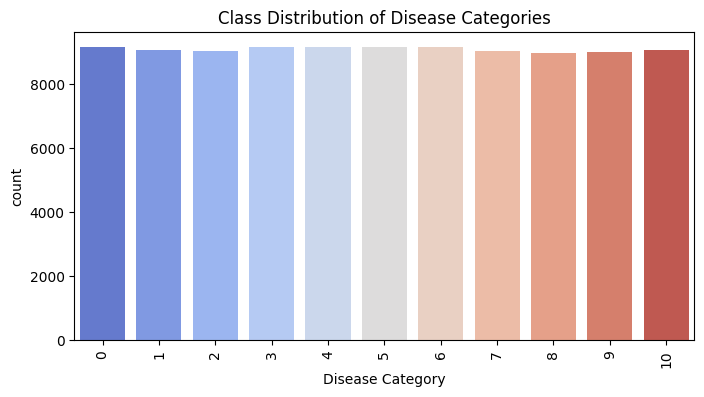

In [132]:
# to check balance

plt.figure(figsize=(8, 4))
sns.countplot(x=classification_df["Disease Category"], palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Class Distribution of Disease Categories")
plt.show()

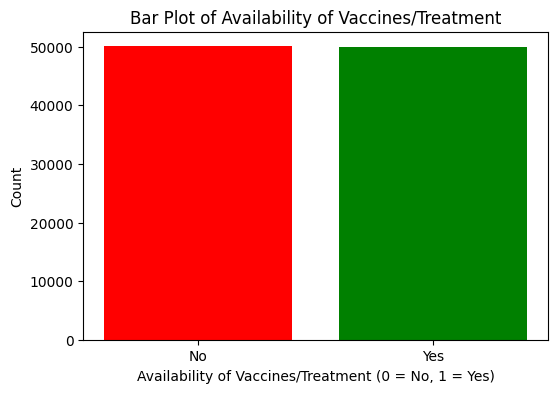

In [133]:
import seaborn as sns

# Count occurrences of each class (0 = No, 1 = Yes)
availability_counts = classification_df["Availability of Vaccines/Treatment"].value_counts()

# Plot the bar chart
plt.figure(figsize=(6, 4))
plt.bar(availability_counts.index, availability_counts.values, color=["red", "green"])

# Customize labels
plt.xticks(ticks=[0, 1], labels=["No", "Yes"])
plt.xlabel("Availability of Vaccines/Treatment (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.title("Bar Plot of Availability of Vaccines/Treatment")

# Show the plot
plt.show()


In [134]:
# feature encoding for classification

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

label_enc = LabelEncoder()
for col in ["Disease Category", "Gender", "Age Group"]:
    classification_df[col] = label_enc.fit_transform(classification_df[col])

print("Encoded Classification Data Head:\n", classification_df.head())


Encoded Classification Data Head:
   Availability of Vaccines/Treatment  Mortality Rate (%)  Prevalence Rate (%)  \
0                                  0            1.175641            -1.586025   
1                                  1            1.290926             0.419097   
2                                  1            0.407077            -1.592993   
3                                  1           -0.371968            -0.936233   
4                                  1            0.683061            -1.606929   

   Incidence Rate (%)  Healthcare Access (%)  Doctors per 1000  \
0           -1.401916              -1.192975          0.458277   
1            0.246939               0.987286         -1.089160   
2           -1.215605              -1.285118          1.020282   
3           -0.298022               0.709471          0.335098   
4            1.402069              -0.551436          1.436011   

   Hospital Beds per 1000  Per Capita Income (USD)  Education Index  \
0         

In [135]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

print("Column Names:", classification_df.columns.tolist())

Column Names: ['Availability of Vaccines/Treatment', 'Mortality Rate (%)', 'Prevalence Rate (%)', 'Incidence Rate (%)', 'Healthcare Access (%)', 'Doctors per 1000', 'Hospital Beds per 1000', 'Per Capita Income (USD)', 'Education Index', 'Urbanization Rate (%)', 'Age Group', 'Gender', 'Disease Category']


In [136]:
# Define features and target variable
X = classification_df.drop(columns=["Availability of Vaccines/Treatment"])  # Ensure all features are numeric
y = classification_df["Availability of Vaccines/Treatment"]

In [137]:
# Check unique values in the target column
print(classification_df["Availability of Vaccines/Treatment"].unique())


[0 1]


In [138]:
from sklearn.model_selection import train_test_split

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check shapes of the resulting splits
print("X_train shape:", X_train_scaled.shape)
print("X_test shape:", X_test_scaled.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (80000, 12)
X_test shape: (20000, 12)
y_train shape: (80000,)
y_test shape: (20000,)


In [139]:
X_train_scaled = X_train_scaled.astype(np.float64)
y_train = y_train.astype(np.float64)

def initialize_weights(n_features):
    weights = np.zeros(n_features, dtype=np.float64)
    bias = 0.0
    return weights, bias

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Compute loss
def compute_loss(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

In [140]:
# Logistic Regression training function
def train_logistic_regression(X, y, learning_rate=0.01, n_iters=1000):
    m, n = X.shape
    weights, bias = initialize_weights(n)

    for _ in range(n_iters):
        # Compute predictions
        linear_model = np.dot(X, weights) + bias
        y_pred = sigmoid(linear_model)

        # Compute gradients
        dw = (1 / m) * np.dot(X.T, (y_pred - y))
        db = (1 / m) * np.sum(y_pred - y)

        # Update weights and bias
        weights -= learning_rate * dw
        bias -= learning_rate * db

    return weights, bias

In [141]:
weights, bias = train_logistic_regression(X_train_scaled, y_train, learning_rate=0.01, n_iters=1000)

# Prediction function
def predict(X, weights, bias):
    linear_model = np.dot(X, weights) + bias
    y_pred = sigmoid(linear_model)
    return [1 if i > 0.5 else 0 for i in y_pred]

# Make predictions
y_pred = predict(X_test_scaled, weights, bias)

# Evaluate model accuracy
accuracy = np.mean(np.array(y_pred) == y_test)
print("Logistic Regression Accuracy:", accuracy)

Logistic Regression Accuracy: 0.50575


In [142]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

# Assuming y_pred is your model's predicted output and y_test is the true output
# Check if y_test or y_pred contain NaN values
print("NaN values in y_test:", y_test.isna().sum())
print("NaN values in y_pred:", np.isnan(y_pred).sum())

# If there are NaNs, you should remove or handle them
# Make sure y_pred is binary (0 or 1)
y_pred = np.array(y_pred)  # Ensure y_pred is an array
y_pred = np.where(y_pred > 0.5, 1, 0)  # Apply thresholding at 0.5

# Ensure y_test is binary as well
y_test = y_test.astype(int)

# Now calculate accuracy and metrics
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression (Scratch) Accuracy:", accuracy)

# Print the classification report (includes precision, recall, f1-score for each class)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"\nConfusion Matrix:\n{conf_matrix}")

# Precision, Recall, and F1-Score for class 1 (as an example, you can specify class 0 or both)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


NaN values in y_test: 0
NaN values in y_pred: 0
Logistic Regression (Scratch) Accuracy: 0.50575

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.54      0.52     10010
           1       0.51      0.48      0.49      9990

    accuracy                           0.51     20000
   macro avg       0.51      0.51      0.51     20000
weighted avg       0.51      0.51      0.51     20000


Confusion Matrix:
[[5368 4642]
 [5243 4747]]
Precision: 0.51
Recall: 0.51
F1-Score: 0.51


In [143]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Model 1: Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
log_reg.fit(X_train_scaled, y_train)
#predict
y_pred_log_reg = log_reg.predict(X_test_scaled)

#accuracy
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print("Logistic Regression Accuracy:", accuracy_log_reg)

Logistic Regression Accuracy: 0.5036


In [144]:
from sklearn.ensemble import RandomForestClassifier
#train random forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
#predict
y_pred_rf = rf_model.predict(X_test_scaled)

#accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

Random Forest Accuracy: 0.49945


In [ ]:
from sklearn.metrics import classification_report

print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_log_reg))

print("Random Forest Report:")
print(classification_report(y_test, y_pred_rf))


Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50     10010
           1       0.50      0.50      0.50      9990

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000

Random Forest Report:
              precision    recall  f1-score   support

           0       0.50      0.53      0.51     10010
           1       0.50      0.47      0.48      9990

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



best model

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist_rf = {
    'n_estimators': randint(50, 100),
    'max_depth': [10, 20, 30, None],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],
}

# Initialize RandomForestClassifier model
rf_model = RandomForestClassifier(random_state=42)

# RandomizedSearchCV with 5-fold cross-validation
randomized_search_rf = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist_rf, n_iter=20, cv=3, n_jobs=-1, scoring='accuracy', random_state=42)
randomized_search_rf.fit(X_train_scaled, y_train)

# Best model from RandomizedSearch
best_rf_randomized = randomized_search_rf.best_estimator_

# Predictions using the best model
y_pred_rf_randomized = best_rf_randomized.predict(X_test_scaled)

# Accuracy of the best model
accuracy_rf_randomized = accuracy_score(y_test, y_pred_rf_randomized)
print("Best Parameters for Random Forest (Randomized):", randomized_search_rf.best_params_)
print("Random Forest Best Accuracy (Randomized):", accuracy_rf_randomized)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score

# Define K-Fold Cross Validation (e.g., 5 folds)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Hyperparameter grid for Logistic Regression
log_reg_params = {
    'C': [0.1, 1, 10],  # Regularization strength
    'solver': ['lbfgs', 'liblinear'],  # Solvers to try
    'max_iter': [500, 1000, 2000]  # Number of iterations
}

# Set up GridSearchCV for Logistic Regression with K-Fold
log_reg_grid = GridSearchCV(estimator=LogisticRegression(random_state=42, class_weight='balanced'),
                            param_grid=log_reg_params,
                            cv=kfold,
                            n_jobs=-1,
                            verbose=1)

# Fit the grid search to the data


grid_search = GridSearchCV(LogisticRegression(), log_reg_params, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

print("\nBest Hyperparameters for logistic regression:", grid_search.best_params_)




Best Hyperparameters for logistic regression: {'C': 0.1, 'max_iter': 500, 'solver': 'lbfgs'}


In [150]:
from sklearn.metrics import classification_report

# Logistic Regression Classification Report
print("\nTuned Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))




Tuned Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50     10010
           1       0.50      0.50      0.50      9990

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



In [149]:
from sklearn.feature_selection import SelectKBest, f_classif
feature_selector = SelectKBest(score_func=f_classif, k=3)
X_train_selected = feature_selector.fit_transform(X_train, y_train)
X_test_selected = feature_selector.transform(X_test)

selected_features = [X_train.columns[i] for i in feature_selector.get_support(indices=True)]
print("\nSelected Features:", selected_features)



Selected Features: ['Per Capita Income (USD)', 'Education Index', 'Urbanization Rate (%)']


In [148]:
best_model=LogisticRegression(C=0.1, max_iter= 500, solver= 'lbfgs', class_weight='balanced')
best_model.fit(X_train_selected, y_train)
y_pred_best = best_model.predict(X_test_selected)

print("Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))


Accuracy: 0.50305
              precision    recall  f1-score   support

           0       0.50      0.51      0.51     10010
           1       0.50      0.50      0.50      9990

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000

